In [1]:
import requests
import scipy
from matplotlib import pyplot as plt
import scipy.stats as stats
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# Housefly wings span data https://seattlecentral.edu/qelp/sets/057/057.html

data = requests.get('https://seattlecentral.edu/qelp/sets/057/s057.txt').text.strip().split('\n')
data = list(map(lambda x: int(x), data))

# Convert the data into a numpy array.
data = np.array(data)

x = np.linspace(min(data), max(data), 100)

In [4]:
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data).mode
std = np.std(data)
pdf = stats.norm.pdf(x, mean, std)

Text(0, 0.5, 'Frequency')

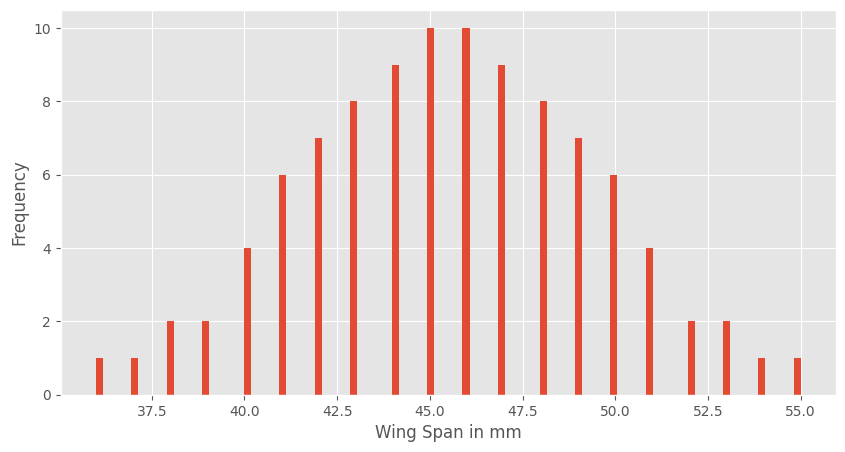

In [5]:
plt.hist(data, bins=100)
plt.xlabel("Wing Span in mm")
plt.ylabel("Frequency")

Text(41.6, -0.008, '-1 Std Dev')

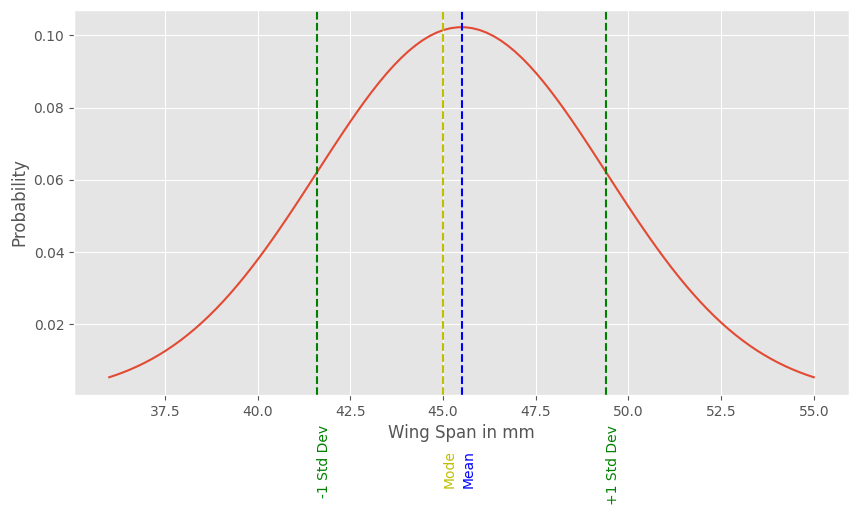

In [6]:
plt.plot(x, pdf)
plt.axvline(mean, color='b', linestyle='dashed')
plt.axvline(mode, color='y', linestyle='dashed')
plt.axvline(mean+std, color='g', linestyle='dashed')
plt.axvline(mean-std, color='g', linestyle='dashed')

plt.ylabel("Probability")
plt.xlabel("Wing Span in mm")
plt.text(mean, -0.015, 'Mean', color='b', rotation=90, verticalalignment='top')
plt.text(mode, -0.015, 'Mode', color='y', rotation=90, verticalalignment='top')
plt.text(mean+std, -0.008, '+1 Std Dev', color='g', rotation=90, verticalalignment='top')
plt.text(mean-std, -0.008, '-1 Std Dev', color='g', rotation=90, verticalalignment='top')